# 1) Monte Carlo simulation
## Monte Carlo integration

### Example 1
a) Estimate the following integral by using the Monte carlo simulation. Then compare the result with the exact value.

$$ \theta=\int_0^1 x dx. $$

In [15]:
import numpy as np
# Generating random numbers from a uniform dis. (here U(0, 1))
M = 10000
x = np.random.uniform(0, 1, M)
# Taking the sample mean of the data just generated
theta_est = np.mean(x)
theta_est

0.5007694346408827

In [134]:
print(f"theta_est = {theta_est:.4f}")

theta_est = 0.5000


In [18]:
theta_exact = (1**2 - 0**2) / 2
theta_exact

0.5

b) What about the following integral?
$$ \theta=\int_3^7 x^2 dx. $$

In [149]:
# The limits of the integral given in this example is [3, 7]:
M = 10000
# Setting the limits and generating a random sample from U(a, b)
a = 3
b = 7
x = np.random.uniform(a, b, M)
# Obtaining the estimated integral
theta_est = (b - a) * np.mean(x**2)
print(f"theta_est = {theta_est:.4f}")

theta_est = 105.4337


In [141]:
theta_exact = (b**2 - a**2) / 2
theta_exact

20.0

### Example 2
Estimate the following integral by using the Monte Carlo simulation. Then compare the result with the exact value.

$$ \theta=\int_{-0.5}^1 \frac{1}{2\pi}e^{-\frac{x^2}{2}} dx. $$

In [43]:
M = 10000
a = -0.5
b = 1
x = np.random.uniform(a, b, M)
theta_est = (b - a) * np.mean(1 / (2 * np.pi)**0.5 * np.exp(- x ** 2 / 2))
theta_est
print(f"theta_est = {theta_est:.5f}")

theta_est = 0.53277


In [42]:
import scipy.stats as stat
theta_exact = stat.norm.cdf(b, 0, 1) - stat.norm.cdf(a, 0, 1)
print(f"theta_exact = {theta_est:.5f}")

theta_exact = 0.53269


### Importance sampling
_Interested readers can study the importance sampling as a general method to the simple Monte Carlo integration._
Rizzo, M. (2008). Statistical computing with R.

## Solving probabilistic problems using Monte Carlo simulation

### Example 3
In the problem of a fair coin toss, what is the probability of getting the head?

In [79]:
S = ['H', 'T']   #our sample space
type(S)

list

In [80]:
m = 10000
x = np.random.choice(S, size = m, replace = True)
np.mean(x == 'H')

0.5004

In [83]:
M = range(1, 10000)
prob = []
for m in M:
    x = np.random.choice(S, size = m, replace = True)
    prob.append(np.mean(x == 'H'))   


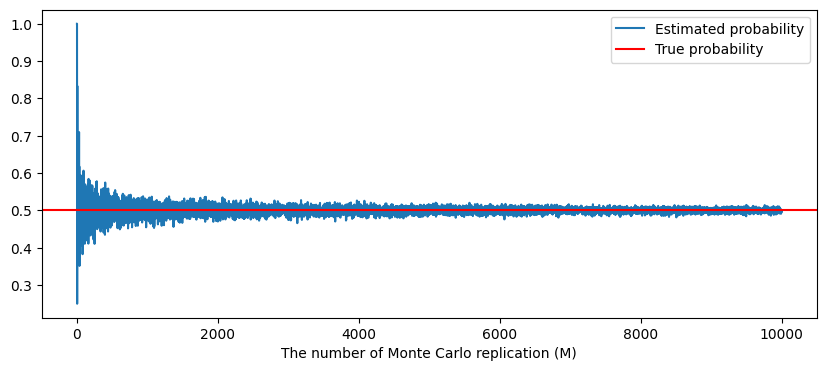

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(M, prob, label = "Estimated probability")
plt.axhline(y = 0.5, color = 'red', label = "True probability")
plt.xlabel("The number of Monte Carlo replication (M)")
plt.legend()
plt.show()

### Example 4
If our experiment consists of tossing a fair die,  then find the approximate  probability
of the following events:


$A = \{6\}$

In [24]:
S = np.arange(1, 7) # sample space
S

array([1, 2, 3, 4, 5, 6])

In [25]:
M = 10000
x = np.random.choice(S, size = M, replace = True)
np.mean(x == 6)

0.1682

In [108]:
1 / 6

0.16666666666666666

b) $B = \{any~ odd~ number\}$

In [26]:
M = 10000
x = np.random.choice(S, size = M, replace = True)
np.mean(x % 2 != 0)

0.5013

### Example 5
Suppose that we toss 2 fair dice,  and suppose that each of the 36 possible outcomes is equally likely to occur. Approximate the probability of the following events by using the Monte Carlo simulations:

**a) A = {summation of outcomes be greater than 5}**

In [85]:
S = np.arange(1, 7)
M = 10000
x = np.random.choice(S, size = M, replace = True)
y = np.random.choice(S, size = M, replace = True)
np.mean(x + y > 5)


0.7315

_Question: You please obtain the exact value of this probability!_

In [90]:
def toss_prob (k, M = 10000):
    x = np.random.choice(S, size = M, replace = True)
    y = np.random.choice(S, size = M, replace = True)
    return np.mean(x + y > k)
toss_prob(5)

0.7251

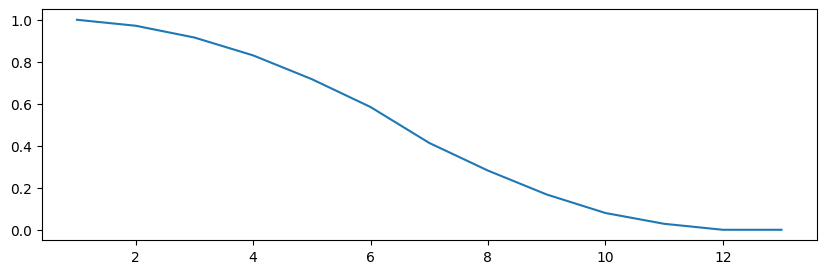

In [73]:
toss_prob = np.vectorize(toss_prob)
k = np.arange(1, 14)
probs = toss_prob(k)
probs
plt.figure(figsize=(10, 3))
plt.plot(k, probs)
plt.show()

**b) B = {die 1 = die 2}**

In [117]:
np.mean(x == y)

0.1729

In [118]:
1/ 6


0.16666666666666666

**b) C = {die1 < die2}**

In [119]:
np.mean(x < y)

0.4175

In [148]:
15 / 36

0.4166666666666667

### Example 6: Question 1
Suppose that we have 8 fair dice. What is the approximated probability of the following events?
<br>
a) A = {summation of outcomes be greater than 32}
<br>
b) B = {summation of the outcomes of the first 5 dice be less than that of the last 3 dice}
<br>
c) C = {the outcomes are increasing}

_Hint: Solve the above problem using the multi-dimensional arrays given by Numpy_

### Example 7 (probabilistic problems including well-known random variables)
Suppose that we randomly select a value on the unit interval ([0, 1]). What is the probability that the selected point is nearer to the boundries than the center?

In [60]:
M = 10000
x = np.random.uniform(0, 1, M)
np.mean(x < 0.25) + np.mean(x > 0.75)

0.5029

In [61]:
# Let's obtain the exact value of this probability
import scipy.stats as stat
stat.uniform.cdf(0.25, 0, 1) + (1 - stat.uniform.cdf(0.75, 0, 1))

0.5

### Example 8
The annual rainfall (in inches) in a certain region (say X) is 
normally distributed with μ = 40 and σ = 4.What 
is the probabilit thath, for the next year we have at least 45 inchesof  rainfallt

In [130]:
M = 10000
x = np.random.normal(40, 4, size = M)
np.mean(x > 45)

0.1079

In [131]:
# Let's obtain the exact value of this probability
import scipy.stats as stat
1 - stat.norm.cdf(45, 40, 4)

0.10564977366685535

# 2) Some methods for generating random numbers from any distribution
## Probability integral transformation (PIT)

This method is also called _the inverse transform method_ in the literature. It is used for generating random numbers from a given distribution. ution.

The Algorithm:

1- Calculate the cumulative distribution function (CDF) and its inverse for the desired distribution.

2- Generate a random sample U from the standard uniform distribution.

3- Apply the inverse of the F to U to obtain a sample from the desired distribution.

### Example 1

Generate n = 1000 random numbers from a distribution with the following probability density function (pdf)
$$f(x) = 4x^3, \qquad 0<x<1.$$

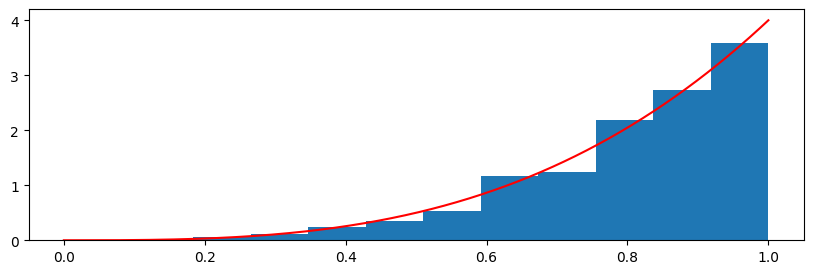

In [59]:
# Step 1: F^{-1}(u) = u**(1 / 4),   0<u<1.

# Step 2: Generating a random sample from U(0, 1)
n = 1000
u = np.random.uniform(0, 1, n)

# Step 3: Applying the inverse CDF to the uniform observations to obtain the desired random smaple
x = u**(1 / 4)

# Plotting
plt.figure(figsize = (10, 3))
plt.hist(x, density=True)

a = np.linspace(0, 1, 1000)
y = 4 * a**3
plt.plot(a, y, color = 'red')
plt.show()

### Example 2
Generate n = 1000 random values from Laplace distribution with the PDF and the inverse of the CDF given by

$$f(x) = \frac{1}{2}e^{-|x|}, \qquad x \in \mathbb{R},$$
and
$$F^{-1}(u)=\left\{ 
\begin{array}{cc}
\log (2u)& \qquad u < 0.5\\
-\log (2(1-u)) & \qquad u > 0.5.
\end{array}
\right.$$

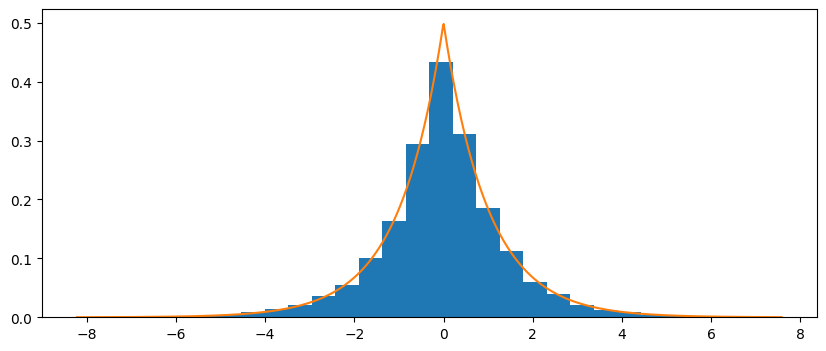

In [17]:
import numpy as np

def random_Laplace(n):
  u = np.random.uniform(0, 1, n)   # Generating a random sample from U(0, 1)
  # Applying the inverse CDF of Laplace dis. on the u
  x = np.zeros(n)   
  for i in range(n):
    if u[i] < 0.5:
        x[i] = np.log(2 * u[i])
    else:
        x[i] = -np.log(2 * (1 - u[i]))
  return x

# Defining the Laplace pdf
def pdf_laplace (x):
  return 0.5 * np.exp(-np.abs(x))

x = random_Laplace(10000)
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 4))
plt.hist(x, bins = 30, density = True)
a = np.linspace(x.min(), x.max(), 1000)
plt.plot(a, pdf_laplace(a))
plt.show()

## Acceptance/Rejection Algorithm

Suppose that you are going to generate a random sample from $f$ (the target distribution). Plus, there is a distribution with pdf $g$ (the proposal distribution) and a constant $M$ such that

$$ \frac{f(x)}{M g(x)} \leq 1, \qquad \forall x.$$
As a result, $M$ can be considered as
$$ M = \sup_{x} \frac{f(x)}{g(x)}.$$wise.

**Steps of the Acceptance-Rejection Algorithm**

- Choose a Proposal Distribution: Select a distribution that is easy to sample from and serves as a "proposal" for generating samples.
  
- Generate Samples: Draw random samples from the proposal distribution.
  
- Calculate Ratios: Calculate the ratio of the target distribution's probability to the proposal distribution's probability for each sample.
  
- Accept or Reject: Accept a sample with probability equal to the calculated ratio. Reject otherwise.

### Example 3
Use the Acceptance-Rejection algorithm in order to generate a random sample from the standard normal distribution. Use the Laplace distribution as the proposal.

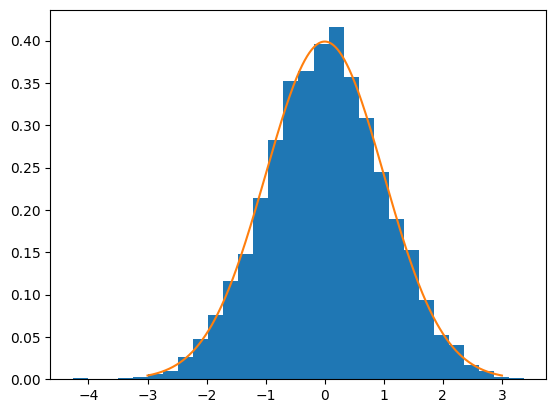

In [30]:
# The target density
def f(x):
    return 1 / (2 * np.pi)**0.5 * np.exp(-x**2 / 2)

# The proposal density
def g(x):
    return pdf_laplace(x)

# Defining the M constant which has already been obtained. We will discuss it later!
M = (2 * np.e / np.pi)**0.5

# The A-R algorithm
n = 10000
y = np.zeros(n)
i = 0
while i < n:
    u = np.random.uniform(0, 1, 1)
    x = random_Laplace(1)
    if f(x) / (M * g(x)) > u:
      y[i] = x
      i += 1

# Plotting
plt.hist(y, 30, density = True)
a = np.linspace(-3, 3, 1000)
plt.plot(a, f(a))
plt.show()

In [ ]:
# How many x's are generated in order to achieve the desired sample size?


In [ ]:
# How can the constant M be obtained?


### Example 4 (Question 2)
Write a function to generate a random sample of size $n$ from the $Beta(a, b)$ distribution by the acceptance-rejection method. Generate a random sample of size 1000 from the $Beta(3,2)$ distribution. Graph the histogram of the sample with the theoretical Beta(3,2) density curve.

_Hint: Use the standard beta distribution U(0, 1) as the proposal._

# 3) Bootstrap method